# DS3000 Day 10

Oct 18, 2024

Admin
- Meet with assigned TA by **TODAY** if you haven't already (all students **must** attend the meeting)
- Lab 3 will be next week **Friday, Oct. 25**
- Phase II of the project due next **Friday, Oct. 25** (Group submission to Gradescope, see ProjectGuidelines on Canvas)
- Homework 3 due **Tuesday, Oct. 29**
- Git help [Link](https://mountainous-tomato-578.notion.site/Useful-Git-Stuff-1202deb51ce8807394abe987a19e1996)
- In-Class Math exam (covers Days 7-10) will be on **Tues, Oct. 29**
  - No notes allowed except one two-sided handwritten note sheet allowed, no python, calculator allowed
  - If you need extra time, other accomodations etc., must do it through it DAS scheduled same day-same time and schedule it with DAS by next Friday (Oct 25th)

Push-Up Tracker
- Section 04: 4
- Section 08: 3

Content:
- Linear Algebra Basics Continued...
  - By Hand and In Python

In [1]:
# packages for today
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import plotly.express as px

### Vector Spaces and Spans

What is a vector space?

- The coordinate planes defined by the dimensions make up the vector space; i.e. the number line makes up the 1-dimensional "vector" space, the $x-y$ axes make up the 2-dimensional vector space (a plane), while the $x-y-z$ axes make up the 3-dimensional vector space, etc.

The **basis vectors** of a vector space are the vectors that "define" the direction of the axes, for example:

- the $x-y$ plane has basis vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$
  - any other vector in 2-dimensional space can be reached by a linear combination of the two basis vectors.
 
**Example:**

$$\begin{bmatrix} 3 \\ 4 \end{bmatrix} = 3\hat{i} + 4\hat{j}$$
$$\begin{bmatrix} -23 \\ 42 \end{bmatrix} = -23\hat{i} + 42\hat{j}$$

In [11]:
ihat = np.array([1,0])
jhat = np.array([0,1])
3*ihat + 4*jhat

array([3, 4])

In [12]:
-23*ihat + 42*jhat

array([-23,  42])

You can use *other* vectors as "basis" vectors. For example, you can determine which coordinates can be reached by a linear combination of the following two vectors:

$$\vec{v} = \begin{bmatrix} 2 \\ 0 \end{bmatrix}$$
$$\vec{w} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$$

This is called finding the **span** of a set of vectors. The **span of the basis vectors $\hat{i}$ and $\hat{j}$ is the entire $x-y$ plane**. How do you determine the span of a set of vectors? Use placeholders:

$$\alpha \vec{v} + \beta \vec{w} = \alpha \begin{bmatrix} 2 \\ 0 \end{bmatrix} + \beta \begin{bmatrix} 1 \\ 2 \end{bmatrix} = \begin{bmatrix} 2\alpha + \beta \\ 2\beta \end{bmatrix}$$

This is a 2-dimensional vector where (using $x$ for the $x$-axis and $y$ for the $y$-axis), $x = 2\alpha + \beta$ or $y = 2\beta$. These functions help us **define the span**; note that there are no restrictions on what $x$ and $y$ can be (given any choices of $\alpha$ and $\beta$), meaning that these two vectors' span is also the entire $x-y$ plane:

$$y = 2(x - 2\alpha) \rightarrow y = 2x - 4\alpha$$

**Example (when the span is *not* the entire plane):**

$$\vec{v} = \begin{bmatrix} -1 \\ -2 \end{bmatrix}$$
$$\vec{w} = \begin{bmatrix} 2 \\ 4 \end{bmatrix}$$
$$\alpha \vec{v} + \beta \vec{w} = \alpha \begin{bmatrix} -1 \\ -2 \end{bmatrix} + \beta \begin{bmatrix} 2 \\ 4 \end{bmatrix} = \begin{bmatrix} -\alpha + 2\beta \\ -2\alpha + 4\beta \end{bmatrix}$$

Which means $x = -\alpha + 2\beta$ and $y = -2\alpha + 4\beta$, which in the 2-dimensional vector space is simply the **line $y=2x$**:

$$y = -2\alpha + 4\beta = 2(-\alpha + 2\beta) = 2x$$

**Fact/Note:** if a 2-d vector is a multiple of the other, you are guaranteed to have a line as the span of the two vectors (above, for example, $\vec{w} = -2\vec{v}$).

#### Spans In Summary

In two-dimensions, there are three cases for the span of any set of 2-dimensional vectors:

- Every point in the plane (see above)
- A line passing through the origin (see above)
- The origin (special case: the span of a set of origin vectors)

In N-dimensions, there are *still* three cases for the span of any set of $N$-dimensional vectors:

- Every point in the $N$-dimensional space
- A reduced dimensionality space, passing through the origin (e.g. a plane or a line in 3-dimensions)
- The origin

**Finally**: the span of $N$ vectors is never more than $N$-dimensional space.

- Example: The span of any single vector (of any dimension) is either a line or the origin (if it is the origin):

$$\vec{v} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$$

Even though $\vec{v}$ exists in 3-dimensional space, the span of this single vector are any points reached by: $\alpha \vec{v} = \begin{bmatrix} \alpha \\ 2\alpha \\ 3\alpha \end{bmatrix}$, which is the line $z = x + y$ in 3-dimensional space.

### Linear Dependence and Independence

A set of vectors is **linearly dependent** if one of the vectors is a linear combination of the others:

- i.e. if the span is a line (see above, and below)

A set of vectors is **linearly independent** if each vector adds a new dimension to the span

- see below for general idea

**Linearly Dependent Vectors**:

The set of vectors: $\vec{a} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$, $\vec{b} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$, and $\vec{c} = \begin{bmatrix} 2 \\ 3 \\ 0 \end{bmatrix}$ is linearly dependent because $\vec{c} = 2\vec{a} + 3\vec{b}$.

**Linearly Independent Vectors**:

The set of vectors: $\vec{a} = \begin{bmatrix} \alpha \\ 0 \end{bmatrix}$ and $\vec{b} = \begin{bmatrix} \beta \\ \text{Anything Non-Zero} \end{bmatrix}$ for any $\alpha$ and $\beta$ is linearly independent.

**Fact/Note:** $N+1$ or more vectors of length $N$ are linearly dependent. Example:

The set of vectors: $\vec{a} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$, $\vec{b} = \begin{bmatrix} -4 \\ 6 \end{bmatrix}$, and $\vec{c} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ is linearly dependent because $\vec{b} = -2\vec{a} + 8\vec{c}$.

- This is actually a very important point for machine learning with data. When you have more **features** than **observations** (this is called the [Large p, small n problem](https://www.google.com/search?q=Large+p%2C+small+n+problem&sca_esv=576533920&sxsrf=AM9HkKl_8u1hxRNyO9OTf4YbeWyD68GxSw%3A1698255238798&ei=hlE5ZduOMIKU5OMPj5mxOA&ved=0ahUKEwjb6fvh3ZGCAxUCCnkGHY9MDAcQ4dUDCBA&uact=5&oq=Large+p%2C+small+n+problem&gs_lp=Egxnd3Mtd2l6LXNlcnAiGExhcmdlIHAsIHNtYWxsIG4gcHJvYmxlbTIFEAAYgAQyCBAAGIoFGIYDMggQABiKBRiGAzIIEAAYigUYhgNIqSdQ0AZYuiZwBHgBkAEBmAHsAaABpRWqAQYxNy42LjK4AQPIAQD4AQHCAgoQABhHGNYEGLADwgIEECMYJ8ICBxAuGIoFGCfCAggQABiKBRiRAsICCxAuGIoFGLEDGIMBwgIREC4YgAQYsQMYgwEYxwEY0QPCAgcQIxiKBRgnwgILEC4YgwEYsQMYgATCAgsQABiKBRixAxiDAcICCxAAGIAEGLEDGIMBwgIOEC4YgAQYxwEYrwEYjgXCAggQLhiABBixA8ICDhAuGIAEGLEDGMcBGNEDwgIIEAAYgAQYsQPCAgoQABiABBgUGIcCwgIGEAAYFhge4gMEGAAgQYgGAZAGCA&sclient=gws-wiz-serp)) it means that you are almost certainly going to overfit your data (and, that the features are linearly dependent). We can see a practical example of this when we learn line of best fit shortly.

### Eigenvalues and Eigenvectors

An **eigenvector** is a vector that for a given transformation, doesn't move off its own span, or in a simple case:

- a non-zero vector $\vec{v}$ associated with a square matrix $A$ such that

$$A\vec{v} = \lambda\vec{v}$$

In other words, multiplying $\vec{v}$ by $A$ only scales $\vec{v}$ by $\lambda$.

- $\lambda$ is called the **eigenvalue** of the **eigenvector** $\vec{v}$

How would we use this?

**Example**

Find the eigenvalues and eigenvectors for the given matrix:

$$A = \begin{bmatrix}
    -1 & 3 \\ 0 & 2
\end{bmatrix}$$

We know:

$$A\vec{v} = \lambda\vec{v}$$

And we wish to find both $\lambda$ and $\vec{v}$. We can rewrite:

$$A\vec{v} - \lambda\vec{v} = \vec{0}$$
$$(A - \lambda I)\vec{v} = \vec{0}$$

How do we determine what the values of $\lambda$ are? Notice that we want to, essentially, reduce the space of the vector $\vec{v}$ to the origin. **We want the matrix it is multiplied by to have a determinant of zero**:

$$det(A - \lambda I) = 0$$
$$A - \lambda I = \begin{bmatrix}
    -1-\lambda & 3 \\ 0 & 2-\lambda
\end{bmatrix}$$
$$det(A - \lambda I) = (-1-\lambda)(2-\lambda) - (3)(0) = 0$$
$$(-1-\lambda)(2-\lambda) = 0$$

This implies that the eigenvalues are $\lambda = \{-1,2\}$.

And the eigenvectors? Use each of the eigenvalues to figure them out:

$$\lambda = -1$$
$$\begin{bmatrix}
    -1-(-1) & 3 \\ 0 & 2-(-1)
\end{bmatrix}\begin{bmatrix}
    x \\ y
\end{bmatrix} = \begin{bmatrix}
    0 \\ 0
\end{bmatrix}$$
$$\begin{bmatrix}
    0 \\ 0
\end{bmatrix}x + \begin{bmatrix}
    3 \\ 3
\end{bmatrix}y = \begin{bmatrix}
    0\\0
\end{bmatrix}$$

When $\lambda=-1$, the eigenvector(s) are anything on the $x$-axis.

$$\lambda = 2$$
$$\begin{bmatrix}
    -1-(2) & 3 \\ 0 & 2-2
\end{bmatrix}\begin{bmatrix}
    x \\ y
\end{bmatrix} = \begin{bmatrix}
    0 \\ 0
\end{bmatrix}$$
$$\begin{bmatrix}
    -3 \\ 0
\end{bmatrix}x + \begin{bmatrix}
    3 \\ 0
\end{bmatrix}y = \begin{bmatrix}
    0\\0
\end{bmatrix}$$
$$-3x + 3y = 0$$
$$-x+y=0$$
$$x=y$$

When $\lambda = 2$, the eigenvector(s) are all scaled versions of $\begin{bmatrix}
    1\\1
\end{bmatrix}$. For simplicity's sake, we usually just say $\begin{bmatrix}
    1\\1
\end{bmatrix}$, since:


 - **Any scaled version of an eigenvector is also an eigenvector with the same eigenvalue**

In [17]:
# we can use NumPy to find eigenvalue and eigenvector pairs easily
A = np.array([[-1, 3], [0, 2]])

print('eigenvalues:', np.linalg.eig(A)[0])

eigenvalues: [-1.  2.]


In [18]:
# format the eigenvector matrix; the columns are the eigenvectors corresponding to the eigenvalues
# note that these any multiple of each column is also an eigenvector
Matrix(np.linalg.eig(A)[1])

Matrix([
[1.0, 0.707106781186547],
[  0, 0.707106781186547]])

## Lecture Break/Practice

Find the eigenvalues and corresponding eigenvectors of the matrix:

$$A = \begin{bmatrix}
    1 & 5 \\ 2 & 4
\end{bmatrix}$$

Do it first by hand, then use NumPy to verify.

In [15]:
A = np.array([[1, 5], [2, 4]])

print('eigenvalues:', np.linalg.eig(A)[1])

eigenvalues: [[-0.92847669 -0.70710678]
 [ 0.37139068 -0.70710678]]


### Orthogonality

Vectors are **orthogonal** if their dot product is zero (equivalently, if the angle between them is 90 degrees).

**Examples:**

In [19]:
# the basis vectors are orthogonal
np.dot(ihat, jhat)

0

In [20]:
northwest = np.array([-1,1])
northeast = np.array([1, 1])
np.dot(northwest, northeast)

0

## Projections

A **projection** is a matrix transformation that we can apply to a vector as many times as we'd like and always get the same result. I.e. for the same $b$:

- $A\vec{x} = b$
- $AA\vec{x} = b$
- $AAA\vec{x} = b$
- $\cdots$

**Counterexample and Example**:

The matrix $A = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix}$ (from before) is **NOT** a projection matrix:

In [21]:
print(f'A = {A}')
print(f'x = {x}')
print(f'Ax = {np.matmul(A, x)}')
print(f'AAx = {np.matmul(A, np.matmul(A, x))}')
print(f'AAAx = {np.matmul(A, np.matmul(A, np.matmul(A, x)))}')

A = [[-1  3]
 [ 0  2]]
x = [2 4]
Ax = [10  8]
AAx = [14 16]
AAAx = [34 32]


In [22]:
A = np.array([[1, 0],
              [0, 0]])
print(f'A = {A}')
print(f'x = {x}')
print(f'Ax = {np.matmul(A, x)}')
print(f'AAx = {np.matmul(A, np.matmul(A, x))}')
print(f'AAAx = {np.matmul(A, np.matmul(A, np.matmul(A, x)))}')

A = [[1 0]
 [0 0]]
x = [2 4]
Ax = [2 0]
AAx = [2 0]
AAAx = [2 0]


Projection matrices are used to **project** vectors from higher-dimensional space into lower-dimensional space. In the above, the result $\begin{bmatrix} 2 \\ 0 \end{bmatrix}$ is the **projection of $\vec{x}$ onto the span of $A$**. Let's back up and look at this slowly:

Say you have a vector space defined by the following vectors:

$$\vec{v} = \begin{bmatrix} -1 \\ -2 \end{bmatrix}$$
$$\vec{w} = \begin{bmatrix} 2 \\ 4 \end{bmatrix}$$

We previously showed that the span of these vectors is a line, $y = 2x$. Since we know the vectors are multiples of each other, we can actually see that we only need one vector to properly define the span.

Let's choose to rename $\vec{w}$ to be $\vec{a} = \begin{bmatrix} 2 \\ 4 \end{bmatrix}$. Suppose there is another 2-dimensional vector which we wish to **project onto the span of $\vec{a}$?** In other words, find the point in the span of $\vec{a}$ that is closest to this new vector, say $\vec{b} = \begin{bmatrix} -2 \\ 3 \end{bmatrix}$.

(Visualize this on the board)

Let's call:

- $\vec{p}$: the projection of $\vec{b}$ onto the span of $\vec{a}$, it is a scaled version of $\vec{a}$
- $\vec{e}$: the vector orthogonal to $\vec{a}$ (at 90 degrees) which "points" to $\vec{b}$

From this we can write down some facts using vector algebra/definitions:

- $\vec{p} = c \times \vec{a}$, where $c$ is some scalar
- $\vec{b} = \vec{p} + \vec{e}$, and thus $\vec{e} = \vec{b} - \vec{p}$
- $\vec{a} \cdot \vec{e} = 0$, since $\vec{a}$ and $\vec{e}$ are orthogonal
  - The dot product is also the multiplication of the transpose of $\vec{a}$ and $\vec{e}$: $\vec{a}^T\vec{e}$ (you can confirm this by hand)

**Note**: I'm going to shift notation from hereon, because it's taking me too long to make these lectures! Just a small change: I'm going to omit the arrow on top of vectors, they will just be lowercase letters from now on (i.e. $\vec{a} = a$, for simplicity of my typing and also because it doesn't really matter as long as it's clear when something is a vector. If you're ever confused about notation, just ask!

From these three facts, we can rearrange things:

- $e = b - c \times a$
- $a^T(b - c\times a) = 0$
- $a^Tb - a^Tca = 0$
- $c = \frac{a^Tb}{a^Ta} = \frac{a \cdot b}{a \cdot a}$

Which is, in fact, all we need to find the projection:

In [42]:
a = np.array([2, 4])
b = np.array([-2, 3])
c = np.dot(a, b)/np.dot(a, a)
print(c)
p = c*a
print(c)
p

0.4
0.4


array([0.8, 1.6])

#### In higher dimensions

Now suppose we want to project $b = \begin{bmatrix} 3 \\ 1 \\ 5 \end{bmatrix}$ onto the span of $a_0 = \begin{bmatrix} 0 \\ 3 \\ 0 \end{bmatrix}$ and $a_1 = \begin{bmatrix} 2 \\ 1 \\ 0 \end{bmatrix}$. We can show that the span is the $x-y$ plane:

$$\alpha \begin{bmatrix} 0 \\ 3 \\ 0 \end{bmatrix} + \beta \begin{bmatrix} 2 \\ 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 2\beta \\ 3\alpha + \beta \\ 0 \end{bmatrix}$$

Which implies $z = 0$ (or, no third dimensional values in the span), $y = 3\alpha + \frac{x}{2}$ which can be anything for a given $\alpha$.

It should be obvious, because $b$ has a $z$-coordinate of 5, that $b$ is **NOT** in the span of $a_0$ and $a_1$ (it is not on the $x-y$ plane). Let's project it down to that lower-dimensional space.

(Can try to draw a picture)

Note some similarities to the two dimensional case:

- $p = c_0 a_0 + c_1 a_1 = Ac$
  - **Note**: here, the two scalars that scale the $a$ vectors are treated as two values in a vector $c$, and the two $a$ vectors are now the columns in a $3\times2$ matrix, $A$.
- $b = p + e$, and thus $e = b - p$
- $a_0 \cdot e = a_1 \cdot e = 0$
  - Or, equivalently, $A^Te = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$

Using the same framework as in 2-dimensions, we can again rearrange things:

- $e = b - Ac$
- $A^T(b - Ac) = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$
- $A^Tb = A^TAc$

**But wait!** the goal is to solve for the $c$ vector. In 2-dimensions there was no problem because $a^Tb$ and $a^Ta$ were both scalars; you could divide them. But now, they are matrices, and you **can't divide matrices**. In order to figure out how to solve this, we need:

### Matrix Inverses (for square matrices)

We would like something to "cancel out" whatever is in front of $c$, so we can get it by itself. I.e. we want $?$ so that:

$$?(A^TA)c = c$$

Simplify the problem (the below is the same thing, just with different notation):

$$?x = x$$

- In general, we'd like to find some matrix $?$ that when you multiply it by $x$ results in only $x$. **Example:** if we want

$$\begin{bmatrix} ? & ? \\ ? & ? \end{bmatrix} \begin{bmatrix} 3 \\ 1 \end{bmatrix} = \begin{bmatrix} 3 \\ 1 \end{bmatrix}$$

What must $\begin{bmatrix} ? & ? \\ ? & ? \end{bmatrix}$ be?

$$\begin{bmatrix} ? & ? \\ ? & ? \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = I$$

This is called the **identity matrix**. I think we've actually already seen this in numpy (a long time ago...):

In [24]:
# gives you the 2-dimensional identity matrix
I = np.eye(2)
I

array([[1., 0.],
       [0., 1.]])

In [25]:
x = np.array([3,1])
np.matmul(I, x)

array([3., 1.])

So, we want $?A^TA = I$...

The **inverse** of a square matrix is the matrix that we multiply it by to result in the identity matrix. In other words, for a square matrix $A$:

$A^{-1}A = I$

And, thus, for the square matrix $A^TA$:

$(A^TA)^{-1}A^TA = I$

We can find this easily with numpy:

In [26]:
A = np.array([[1, 2],
              [3, 4]])
Ainv = np.linalg.inv(A)
Ainv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [27]:
np.matmul(Ainv, A).round()
# note I'm rounding above because python does some weird rounding of it's own under the hood...
# np.matmul(Ainv, A)

array([[1., 0.],
       [0., 1.]])

**Finally**, this means that we can solve for the projection of the point $b = \begin{bmatrix} 3 \\ 1 \\ 5 \end{bmatrix}$ from three-dimensional space down to the span defined by $A = \begin{bmatrix} 0 & 2 \\ 3 & 1 \\ 0 & 0 \end{bmatrix}$, which is the $x-y$ plane:

- $A^Tb = A^TAc$
- $(A^TA)^{-1}A^Tb = c$
- $p = Ac = A(A^TA)^{-1}A^Tb$

In [28]:
A = np.array([[0, 2],
              [3, 1],
              [0, 0]])
b = np.array([3, 1, 5])
AtAinv = np.linalg.inv(np.matmul(A.T, A))
c = np.matmul(AtAinv, np.matmul(A.T, b))
p = np.matmul(A, c)
p

array([3., 1., 0.])

Which, you'll note, is directly "under" $b$ on the $x-y$ plane (if you draw a quick picture).

## Lecture Break/Practice

Find the projection of the point $b = \begin{bmatrix} 1 \\ 2 \\ 4 \end{bmatrix}$ to the span defined by $A = \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}$.

In [2]:
A = np.array([[1, 1],
              [1, 2],
              [1, 3]])
b = np.array([1, 2, 4])
AtAinv = np.linalg.inv(np.matmul(A.T, A))
c = np.matmul(AtAinv, np.matmul(A.T, b))
p = np.matmul(A, c)
p

array([0.83333333, 2.33333333, 3.83333333])

# FINALLY: Welcome to Machine Learning
![f](https://miro.medium.com/v2/resize:fit:1400/1*TOCkiI_kCupxW-0jmi1p6g.jpeg)
## Line of Best Fit (which we will extend into Linear Regression next time)

Believe it or not, if you correctly did that practice problem above, you've already found the line of best fit through a collection of points. How?

- Imagine we have a set of points in any dimensional space (we'll start with 2-d for now) and we would like to find a line that "averages" all the points (or, that best fits them):
  - (Draw a picture on the board)
  - We would like a line that does not necessarily have to go through the origin
  - If points are not already "on" a line, it means that the points (vectors) **don't all share the same span**.
 
**Example**

Imagine we have three two-dimensional vectors which represent the points we want to find the line that fits them best:

$$\begin{bmatrix} 1 \\ 1 \end{bmatrix}, \begin{bmatrix} 2 \\ 2 \end{bmatrix}, \begin{bmatrix} 3 \\ 4 \end{bmatrix}$$

These points correspond to $x-y$ values, which (in a real data sense) correspond to an $x$-feature and a $y$-feature, which we usually throw into their own vectors:

$$x = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}, y = \begin{bmatrix} 1 \\ 2 \\ 4 \end{bmatrix}$$

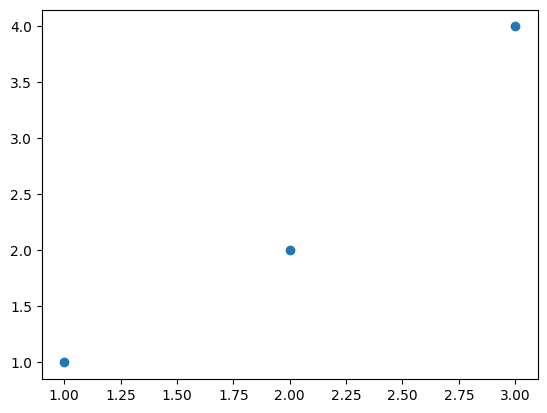

In [29]:
x = np.array([1, 2, 3])
y = np.array([1, 2, 4])
plt.scatter(x, y);

Since the three vectors are not in the same span, this means that there's no single value (call it $m$) that makes $y = mx$. In other words, you can't represent $y$ as a linear combination of $x$. **BUT**, we can find the projection of $x$ onto $y$:

$$p = mx$$

Using the same process as before:

$$p = \frac{x^Ty}{x^Tx}x \rightarrow m = \frac{x^Ty}{x^Tx} = \frac{17}{14}$$

In other words, we found *a* line of best fit for these points, using projections: $y = \frac{17}{14}x$.

What's undesirable about this line, and might mean it's not *the* line of best fit though? **No intercept!**. How to solve this? We add what we call a "bias" (or, "intercept") term to $x$ to turn it into a matrix:

$$X = \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}$$

If everything else remains the same, what happens?

$$p = Xm$$

Where $m$ is now a $2\times 1$ vector instead of a single constant:

$$p = X\left[(X^TX)^{-1}X^Ty\right] \rightarrow m = (X^TX)^{-1}X^Ty = \cdots \text{ see below } \cdots = \begin{bmatrix} \frac{-2}{3} \\ 1.5 \end{bmatrix}$$

In [30]:
X = np.array([[1, 1],
              [1, 2],
              [1, 3]])
XtXinv = np.linalg.inv(np.matmul(X.T, X))
m = np.matmul(XtXinv, np.matmul(X.T, y))
m

array([-0.66666667,  1.5       ])

What does this vector represent? It represents the (respectively) **intercept** and **slope** of the line of best fit through the points:

$$y = \frac{-2}{3} + 1.5x$$

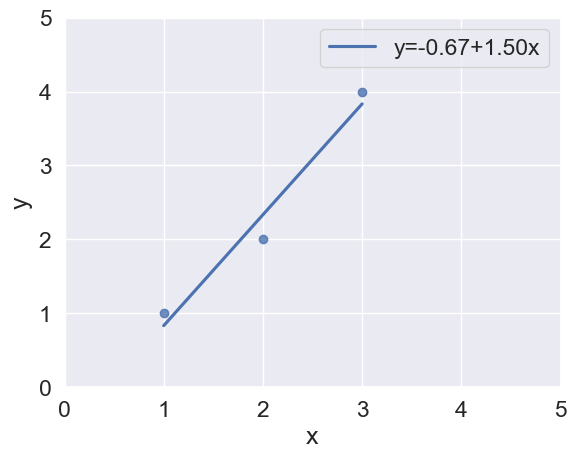

In [31]:
# seaborn's regplot will add the line for us, as long as the data are in a data frame
sns.set(font_scale=1.5)
silly_df = pd.DataFrame({'x': x,
                         'y': y})
plot = sns.regplot(data=silly_df, x='x', y='y', fit_reg=True, ci=None, line_kws={'label':"y={1:.2f}+{0:.2f}x".format(1.5,-.667)});
plot.set(xlim=(0,5), ylim=(0, 5));
plot.legend();

## Up Next (after the Math Midterm)

- Machine Learning Ethics and Linear Regression (we'll add context/motivation to the line of best fit, and do it with some real data)